In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features and sensor identifiers
X = balanced_data[['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ', 'Sensor']].values

# Reshape the data to represent (N, 3, 10) where 3 is the number of sensors
X = X.reshape(-1, 3, 10)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 10)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X = X.reshape(-1, 3, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X = X.reshape(-1, 3, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X = X.reshape(-1, 3, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X = X.reshape(-1, 3, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Choose a shape that divides the data evenly
X = X.reshape(-1, 4, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Choose a shape that divides the data evenly
X = X.reshape(-1, 3, 9)

# Encode class labels
y = balanced_data['Class'].values

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels
y = balanced_data['Class'].values

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Reshape the data to (N, 3, 9)
X = X.reshape(-1, 3, 9)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Define the number of rows to select from each class
num_samples_per_class = min(data['Class'].value_counts())

# Create balanced datasets for each class
balanced_datasets = []

# Group the data by class
grouped = data.groupby('Class')

# Select an equal number of rows from each class
for class_name, group_data in grouped:
    balanced_datasets.append(group_data.sample(n=num_samples_per_class))

# Concatenate the balanced datasets into a single dataset
balanced_data = pd.concat(balanced_datasets)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(balanced_data['Class'])

# Extract features
X = balanced_data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']].values

# Calculate the closest possible shape and reshape
target_shape = (X.shape[0] // 3, 3, 9)
X = X[:target_shape[0] * 3].reshape(target_shape)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values.reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values.reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values.reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values.reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Reshape the data to represent (N, 3, 9) where 3 is the number of sensors
X_train = X_train.values.reshape(-1, 3, 9)
X_val = X_val.values.reshape(-1, 3, 9)
X_test = X_test.values.reshape(-1, 3, 9)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3, 9)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

Epoch 1/10
20/20 [==============================] - 3s 30ms/step - loss: 3.7543 - accuracy: 0.4663 - val_loss: 3.3311 - val_accuracy: 0.3793
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 2.3433 - accuracy: 0.5385 - val_loss: 1.9425 - val_accuracy: 0.6314
Epoch 3/10
20/20 [==============================] - 0s 15ms/step - loss: 1.9090 - accuracy: 0.6058 - val_loss: 1.7064 - val_accuracy: 0.7286
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 1.7166 - accuracy: 0.7051 - val_loss: 1.9258 - val_accuracy: 0.6068
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 1.7473 - accuracy: 0.7099 - val_loss: 1.5944 - val_accuracy: 0.7682
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 1.6573 - accuracy: 0.7260 - val_loss: 1.5983 - val_accuracy: 0.7479
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 1.5734 - accuracy: 0.7997 - val_loss: 1.4758 - val_accuracy: 0.8590
Epoch 8/10
20/20 

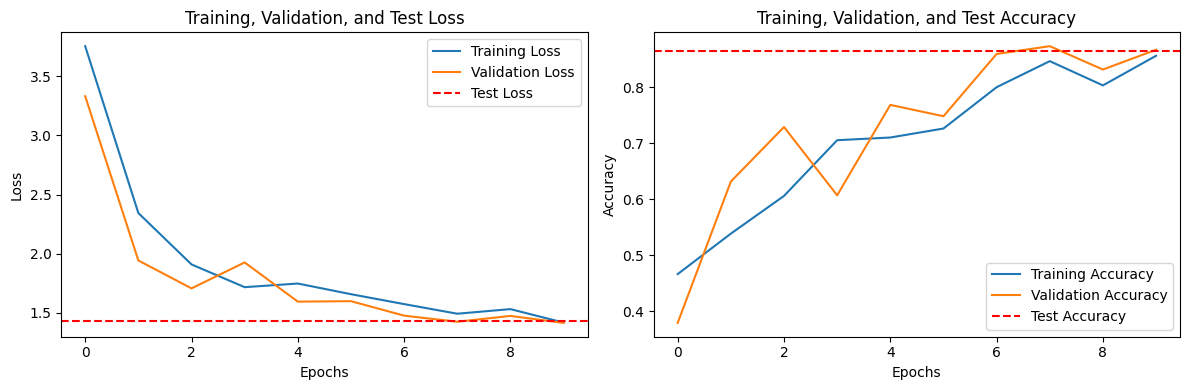

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# **bold text**# Completed MOdel

Epoch 1/10
20/20 [==============================] - 2s 26ms/step - loss: 6.2701 - accuracy: 0.3606 - val_loss: 3.1683 - val_accuracy: 0.4968
Epoch 2/10
20/20 [==============================] - 0s 13ms/step - loss: 2.7869 - accuracy: 0.5369 - val_loss: 2.1310 - val_accuracy: 0.6389
Epoch 3/10
20/20 [==============================] - 0s 14ms/step - loss: 2.1811 - accuracy: 0.5913 - val_loss: 2.2884 - val_accuracy: 0.5609
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 1.9913 - accuracy: 0.6923 - val_loss: 1.8808 - val_accuracy: 0.6239
Epoch 5/10
20/20 [==============================] - 0s 12ms/step - loss: 1.8855 - accuracy: 0.6394 - val_loss: 1.8152 - val_accuracy: 0.7019
Epoch 6/10
20/20 [==============================] - 0s 16ms/step - loss: 1.8826 - accuracy: 0.6827 - val_loss: 1.6491 - val_accuracy: 0.7959
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 1.5598 - accuracy: 0.8013 - val_loss: 1.5435 - val_accuracy: 0.7831
Epoch 8/10
20/

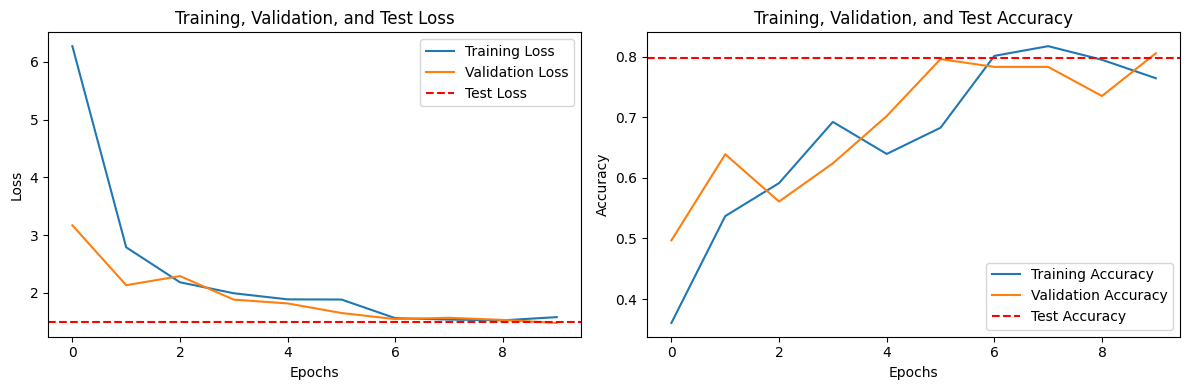

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load data from the Excel sheet
data = pd.read_excel('MergedDataFinal.xlsx')  # Update the filename as needed

# Remove rows with missing values in the 'Class' column
data = data.dropna(subset=['Class'])

# Split the data into training, validation, and test sets, ensuring 25% from each class
X_train, X_temp, y_train, y_temp = train_test_split(data[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ']],
                                                    data['Class'], test_size=0.75, stratify=data['Class'], random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Encode class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Define a Deep Neural Network (DNN) model with no activation functions
model_no_activation = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9,)),  # Input shape to accept data from all three sensors
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model_no_activation.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Train the model
history_no_activation = model_no_activation.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model_no_activation.evaluate(X_test, y_test)
print("Test Performance:")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training, validation, and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_activation.history['loss'], label='Training Loss')
plt.plot(history_no_activation.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Plot training, validation, and test accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_activation.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_activation.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

import tensorflow as tf

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_no_activation)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

